In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [2]:
df=pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


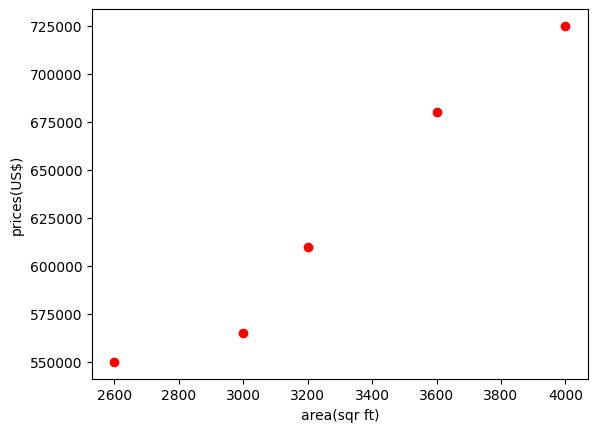

In [3]:
plt.xlabel("area(sqr ft)")
plt.ylabel("prices(US$)")
plt.scatter(df.area,df.price,color="red")

In [4]:
## Training the data on linear regression model
reg=linear_model.LinearRegression()
reg.fit(df[["area"]],df.price)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [5]:
## Prediction
predicted_price=reg.predict([[3300]])
predicted_price

d:\Work\Python\ML\SimpleLinearRegression\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [6]:
reg.coef_

array([135.78767123])

In [7]:
reg.intercept_

np.float64(180616.43835616432)

In [8]:
# Logic behind prediction
# y=m*x+b=>y=reg.coef_*x+reg.intercept_
y=135.78767123*3300+180616.43835616432
y

628715.7534151643

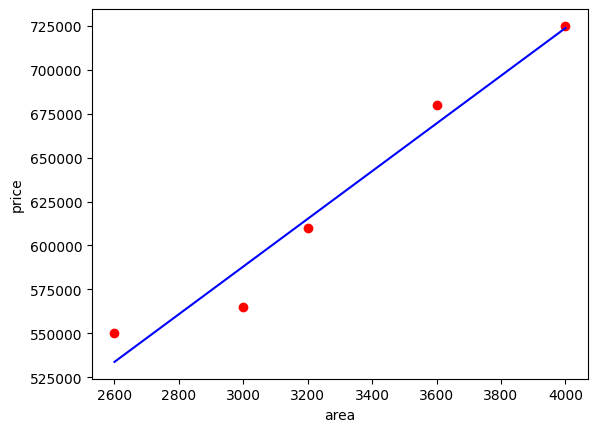

In [9]:
### Plot the regression line
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price,color="red")
## regression line
plt.plot(df.area, reg.predict(df[['area']]), color="blue")

In [10]:
## Use the area csv file to get area data

d=pd.read_csv("areas.csv")
d


,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [11]:
## Prediction based on above areas
p=reg.predict(d)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [12]:
## Include predicted prices in dataframe
d["prices"]=p

In [13]:
## create a csv containing new areas and predicted prices
d.to_csv("prediction.csv",index=False)

### Homework 


In [14]:
df=pd.read_csv("canada_per_capita_income.csv")
df


,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [15]:
df.columns

Index(['year', 'per capita income (US$)'], dtype='object')

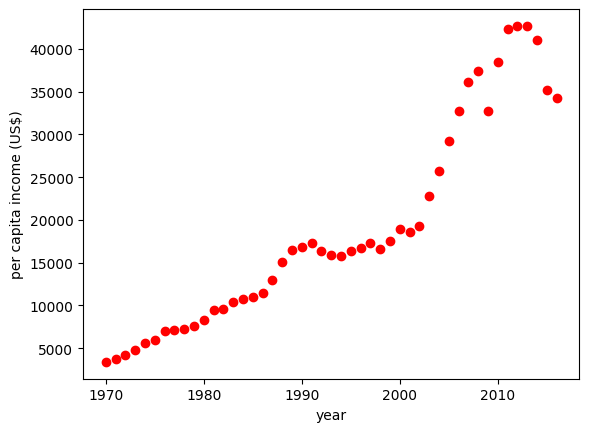

In [16]:
### Plot the data
plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.scatter(df.year,df["per capita income (US$)"],color="red")

In [17]:
##create new regression model and train
reg2=linear_model.LinearRegression()
reg2.fit(df[["year"]],df["per capita income (US$)"])

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


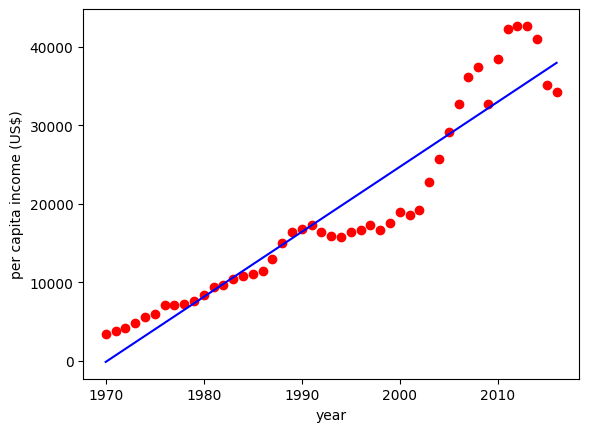

In [18]:
### Plot the data
plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.scatter(df.year,df["per capita income (US$)"],color="red")
plt.plot(df["year"], reg2.predict(df[['year']]), color="blue")

In [19]:
reg2.predict([[2020]])

d:\Work\Python\ML\SimpleLinearRegression\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

### Save model using pickle

In [21]:
import pickle

In [22]:
with open("model_pickle","wb") as f:
    pickle.dump(reg2,f)


In [23]:
### Use the saved model
with open("model_pickle","rb") as f:
    model=pickle.load(f)
    

In [24]:
model.predict([[2020]])

d:\Work\Python\ML\SimpleLinearRegression\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

### Save Model using JobLib

In [27]:
import joblib

joblib.dump(model, "model.joblib")

['model.joblib']

In [28]:
model2 = joblib.load("model.joblib")

In [29]:
model2.predict([[2020]])

d:\Work\Python\ML\SimpleLinearRegression\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])